<a href="https://colab.research.google.com/github/mrSaggio/NEIRO/blob/main/Torch_Klassifikator_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install accelerate -U
! pip install datasets transformers[sentencepiece]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:

from transformers import ViTModel, ViTFeatureExtractor, ViTModel, AdamW
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import pandas as pd
import os
from PIL import Image
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from matplotlib import pyplot as plt


In [5]:

def create_image_dataframe(data_dir):

    file_paths = []
    categories = []
    classes = []

    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            class_label = 0 if category == r'Female Faces' else 1
            for filename in os.listdir(category_path):
                if filename.endswith('.jpg'):
                    file_paths.append(os.path.join(category_path, filename))
                    categories.append(category)
                    classes.append(class_label)

    data = {
        'file_path': file_paths,
        'category': categories,
        'class': classes
    }

    df = pd.DataFrame(data)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

data_dir = '/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new_kleimo'
image_df = create_image_dataframe(data_dir)

print(image_df.shape)
print(image_df.category.value_counts())
image_df.head()


(508, 3)
category
0         111
7          84
1          74
2          65
3          35
4          31
6          31
5          23
8          22
9          20
symbol     12
Name: count, dtype: int64


,file_path,category,class
0,/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new...,1,1
1,/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new...,3,1
2,/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new...,7,1
3,/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new...,9,1
4,/content/drive/MyDrive/NEIRO_KLEIMO_DIGITS/new...,1,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('file_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('class', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('file_path')):
  _plot_series(series, series_name, i)
  fig.legend(title='file_path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('class', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_4.groupby('file_path')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('file_path')
_ = plt.ylabel('category')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('file_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('class', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('file_path')):
  _plot_series(series, series_name, i)
  fig.legend(title='file_path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('file_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('file_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('file_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_4.groupby('file_path')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('file_path')
_ = plt.ylabel('category')

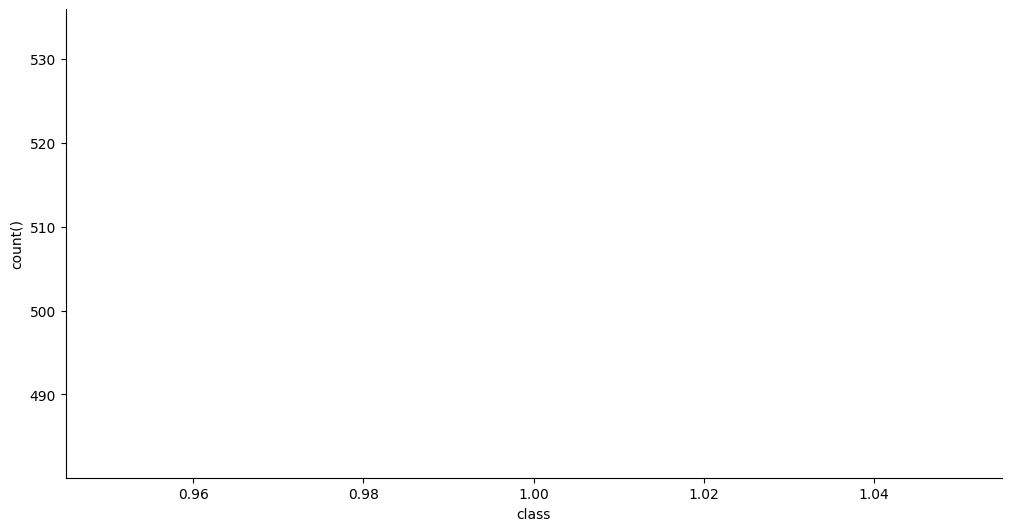

In [6]:
# @title class vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = image_df.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

In [7]:

model_checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = ViTFeatureExtractor.from_pretrained(model_checkpoint)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [8]:

class ImageClassificationDataset(Dataset):
    def __init__(self, data_df, image_processor):
        self.data_df = data_df
        self.image_processor = image_processor
        #self.max_length = 256 # set a fixed maximum length

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):

        image_path = self.data_df.iloc[index]['file_path']
        image_val = Image.open(image_path)

        if image_val.mode != 'RGB':
          image_val = image_val.convert('RGB')

        image_encodings = image_processor(image_val, return_tensors="pt")

        labels = self.data_df.iloc[index][['class']].values.astype(np.float32)

        return image_encodings, labels



In [9]:
train_df, temp_df = train_test_split(image_df, test_size=0.3, random_state=42)

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


In [10]:
train_dataset = ImageClassificationDataset(train_df, ViTFeatureExtractor)
test_dataset = ImageClassificationDataset(test_df, ViTFeatureExtractor)
val_dataset = ImageClassificationDataset(val_df, ViTFeatureExtractor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [11]:

class ImageClassifier(nn.Module):
    def __init__(self, num_labels, encoder):
        super(ImageClassifier, self).__init__()
        self.encoder = encoder
        self.classifier = nn.Sequential(
            nn.Linear(self.encoder.config.hidden_size, 500),
            nn.ReLU(),
            nn.Linear(500, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_labels),
            nn.Sigmoid()
        )

    def forward(self, input_values):
        outputs = self.encoder(pixel_values = input_values)
        pooled_output = outputs['last_hidden_state'][:, 0, :]
        logits = self.classifier(pooled_output)
        return logits


In [12]:
# Set up the model, optimizer, scheduler, and loss function
num_labels = 1
encoder = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
model = ImageClassifier(num_labels, encoder).to(device)
optimizer = AdamW(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.BCELoss()


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [13]:
# Define the training function
def train(model, train_loader, val_loader, optimizer,  criterion, device, num_epochs):

    best_accuracy = 0.0

    for epoch in range(num_epochs):

        model.train()

        for i, batch in enumerate(train_loader):

            image_encodings,  labels = batch
            pixel_values = image_encodings.pixel_values
            pixel_values = pixel_values.squeeze()
            pixel_values = pixel_values.to(device)

            labels = labels.to(device)

            optimizer.zero_grad()

            logits = model(pixel_values)

            loss = criterion(logits, labels)
            loss.backward()

            optimizer.step()

            if (i+1) % 8 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Train Loss: {loss.item() :.4f}')
                train_loss = 0.0

        val_loss, val_accuracy, val_f1, _ , _ = evaluate(model, val_loader, device)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model.pt')

        print("========================================================================================")
        print(f'Epoch {epoch+1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Best Accuracy: {best_accuracy:.4f}')
        print("========================================================================================")


In [14]:
def evaluate(model, data_loader,  device):

    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():

        for i, batch in enumerate(data_loader):

          image_encodings,  labels = batch
          pixel_values = image_encodings.pixel_values
          pixel_values = pixel_values.squeeze()
          pixel_values = pixel_values.to(device)

          labels = labels.to(device)

          optimizer.zero_grad()

          logits = model(pixel_values)

          loss = criterion(logits, labels)
          total_loss += loss.item()

          preds = (logits > 0.5).float()
          all_labels.append(labels.cpu().numpy())
          all_preds.append(preds.cpu().numpy())

    all_labels = np.concatenate(all_labels, axis=0)
    all_preds = np.concatenate(all_preds, axis=0)

    loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    return loss, accuracy, f1, all_labels, all_preds


In [15]:
num_epochs = 2
train(model, train_loader, val_loader, optimizer, criterion, device, num_epochs)

Epoch 1/2, Batch 8/12, Train Loss: 0.7112
Epoch 1/2, Val Loss: 0.6847, Val Accuracy: 1.0000, Val F1: 1.0000, Best Accuracy: 1.0000
Epoch 2/2, Batch 8/12, Train Loss: 0.6352
Epoch 2/2, Val Loss: 0.5843, Val Accuracy: 1.0000, Val F1: 1.0000, Best Accuracy: 1.0000


In [16]:
state_dict = torch.load('best_model.pt')

# Create a new instance of the model and load the state dictionary
num_labels = 1
model = ImageClassifier(num_labels, encoder).to(device)
model.load_state_dict(state_dict)

_, _, _, all_labels, all_preds = evaluate(model, test_loader, device)


print(classification_report(all_labels, all_preds))
print(accuracy_score(all_labels, all_preds))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        77

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

1.0
